In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics  import mean_absolute_error ,mean_squared_error,median_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2,f_classif
import warnings
warnings.filterwarnings('ignore')

***SVR***

In [2]:
df=pd.read_csv('../data/Earthquakes.csv')
df.head()

,latitude,longitude,depth,mag,gap,dmin,rms,horizontalError,depthError,magError,meter
0,5.1033,125.3179,44.32,4.3,131,1.970,0.70,5.0,9.3,0.126,18.0
1,-8.8535,117.1527,116.88,4.9,59,2.991,1.06,6.5,7.3,0.091,38.0
2,4.7512,96.2239,10.00,5.3,148,0.862,1.29,6.6,1.8,0.073,18.0
3,-10.1202,118.7274,10.00,4.5,86,3.764,0.95,7.6,1.9,0.084,42.0
4,1.4361,127.0142,120.78,4.5,105,0.748,0.76,8.0,6.6,0.089,37.0


In [3]:
data = pd.DataFrame(df)


In [4]:
df.shape

(1369, 11)

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         1369 non-null   float64
 1   longitude        1369 non-null   float64
 2   depth            1369 non-null   float64
 3   mag              1369 non-null   float64
 4   gap              1369 non-null   int64  
 5   dmin             1369 non-null   float64
 6   rms              1369 non-null   float64
 7   horizontalError  1369 non-null   float64
 8   depthError       1369 non-null   float64
 9   magError         1368 non-null   float64
 10  meter            1368 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 117.8 KB


In [7]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df=imp.fit_transform(df)

In [8]:
x=df[:, :-1]
y=df[: ,-1]

In [9]:
scale=MinMaxScaler()
X=scale.fit_transform(x)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [11]:
model=SVR(kernel='poly',C=2,epsilon=0.1)

In [12]:
model.fit(x_train,y_train)

SVR(C=2, kernel='poly')

In [13]:
y_pred=model.predict(x_test)

In [14]:
y_pred[:10]

array([21.47244225, 19.94460106, 20.31247915, 34.58900161, 23.35714186,
       43.29089455, 51.58682134,  6.23035663, 56.70119522, 32.49550626])

In [15]:
y_test[:10]

array([ 18.,  28.,  18.,  32.,  22.,  45.,  98.,   8., 142.,  25.])

In [16]:
model.score(x_train,y_train)

0.4809216984500235

In [17]:
model.score(x_test,y_test)

0.40861581743788333

In [18]:
r2_score(y_test,y_pred)

0.40861581743788333

In [19]:
print(f'MAE={mean_absolute_error(y_test,y_pred)}')
print(f'MSE={mean_squared_error(y_test,y_pred)}')

MAE=11.102073935675667
MSE=451.31045608143563


***SVC***

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data=pd.read_csv('../data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
data.shape

(303, 14)

In [23]:
x=data.drop('target',axis=1)
y=data['target']

In [24]:
scale=StandardScaler()
x_new=scale.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=10)

In [26]:
model=SVC(kernel='rbf',C=0.9)

In [27]:
model.fit(x_train,y_train)

SVC(C=0.9)

In [28]:
model.score(x_train,y_train)

0.9251101321585903

In [29]:
model.score(x_test,y_test)

0.8157894736842105

In [30]:
y_prediction=model.predict(x_test)

In [31]:
y_prediction[:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [32]:
y_test[:10]

246    0
183    0
229    0
126    1
184    0
1      1
59     1
194    0
132    1
175    0
Name: target, dtype: int64

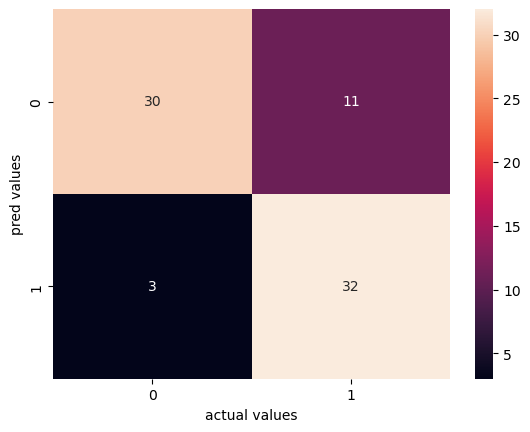

In [ ]:
cm=confusion_matrix(y_test,y_prediction)
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('pred values')
plt.show()